# 9. Clustering_Practice

## k-means 구현

In [14]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def kmeans(k, points):
  prev_assignment = []

  # 임의로 K개의 점을 중심점으로 선택 - forgy
  centroids = points[np.random.choice(points.shape[0], replace = False, size=k)]

  for epoch in range(10):
    # 각 점이 할당될 중심점 계산
    assignments = [assign(p, centroids, k) for p in points]

    # 새로운 centroid 계산
    centroids = compute_centroids(assignments, points, k)

    # 클러스터에 변화가 없을 경우 종료
    if prev_assignment == assignments:
      break
    prev_assignment = assignments

  return assignments, centroids

def assign(point, centroids, k):
  return min(range(k), key=lambda i: np.dot(centroids[i]-point, centroids[i]-point))

def compute_centroids(assignments, points, k):
  vec_sum = [np.zeros(len(points[0])) for _ in range(k)]
  counts = [0] * k

  for i, p in zip(assignments, points):
    vec_sum[i] += p
    counts[i] += 1

  return [vec_sum[i]/counts[i] if counts[i] > 0 else random.choice(points) for i in range(k)]

In [16]:
k = 3

points1 = np.random.randn(80, k)
points2 = np.random.randn(20, k) + np.array([5,5,5])
points3 = np.random.randn(20, k) + np.array([10,5,0])
points = np.concatenate( (points1, points2, points3) )

# kmeans 실행
assignments, centroids = kmeans(k, points)

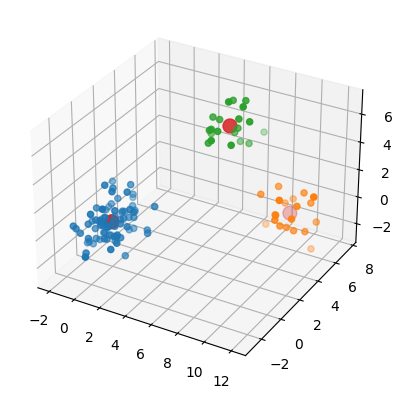

In [17]:
# result

fig = plt.figure()
ax = fig.add_subplot(projection ='3d')

clusters = [[] for _ in range(k)]
for a,p in zip(assignments, points):
  clusters[a].append(p)

for cluster in clusters:
  ax.scatter(*zip(*cluster))

ax.scatter(*zip(*centroids), s=100)
plt.show()

## 이미지 처리 응용

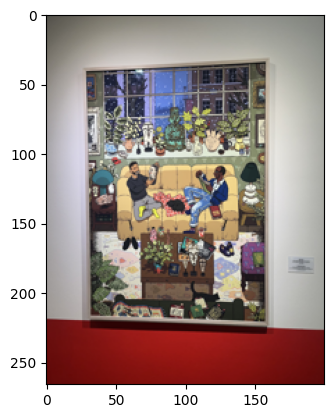

In [18]:
from PIL import Image

# 사진 불러오기 & 크기 조절 & 화면에 출력
im = Image.open("IMG_1144.jpg")

width = 200
height = im.height * width // im.width
im = im.resize((width, height))

plt.imshow(im)
plt.show()

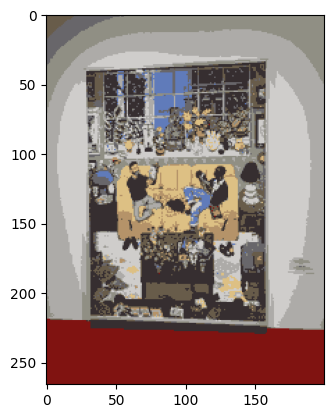

In [19]:
# 데이터 준비 & k-means 알고리즘 적용
pixels = np.array(im).reshape(-1, 3)
assignments, centroids = kmeans(10, pixels)

# 모든 픽셀의 색을 centroid중 하나로 선택
for a, i in zip(assignments, range(pixels.shape[0])):
  pixels[i] = centroids[a]

# 바뀐 그림 출력
im_remastered = Image.fromarray(pixels.reshape(im.height, im.width, 3), 'RGB')
plt.imshow(im_remastered)
plt.show()

## k-means using sklearn

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


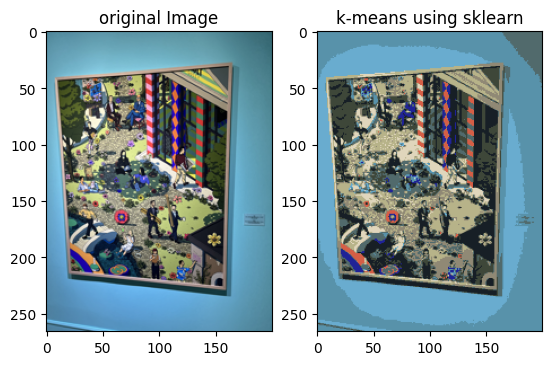

In [20]:
from sklearn.cluster import KMeans
from PIL import Image

# 사진 불러오기 & 크기 조절 & 화면에 출력
im2 = Image.open("IMG_1146.jpg")

width2 = 200
height2 = im2.height * width2 // im2.width
im2 = im2.resize((width2, height2))

pixels2 = np.array(im2).reshape(-1, 3)

# sklearn KMeans
kmeans = KMeans(n_clusters=10)
kmeans.fit(pixels2)

for a, i in zip(kmeans.labels_, range(pixels2.shape[0])):
  pixels2[i] = kmeans.cluster_centers_[a]

im2_remastered = Image.fromarray(pixels2.reshape(im2.height, im2.width, 3), 'RGB')

plt.subplot(1, 2, 1)
plt.imshow(im2)
plt.title("original Image")

plt.subplot(1, 2, 2)
plt.imshow(im2_remastered)
plt.title("k-means using sklearn")
plt.show()

# 10. kNN Practice

DataSet

In [1]:
!wget https://archive.ics.uci.edu/static/public/53/iris.zip
!unzip iris.zip

--2023-11-29 07:27:29--  https://archive.ics.uci.edu/static/public/53/iris.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘iris.zip’

iris.zip                [ <=>                ]   3.65K  --.-KB/s    in 0s      

2023-11-29 07:27:29 (745 MB/s) - ‘iris.zip’ saved [3738]

Archive:  iris.zip
  inflating: Index                   
  inflating: bezdekIris.data         
  inflating: iris.data               
  inflating: iris.names              


데이터 불러오기

In [2]:
x = []
y = []
for line in open("iris.data", "r") :
    line = line.strip()
    if line != "":
        tokens = line.split(",")
        x.append([float(t) for t in tokens[:4]])
        y.append(tokens[4])

y_labels = list(set(y))

y = [y_labels.index(i) for i in y]

In [3]:
import numpy as np
x = np.array(x)
y = np.array(y)


데이터 살펴보기

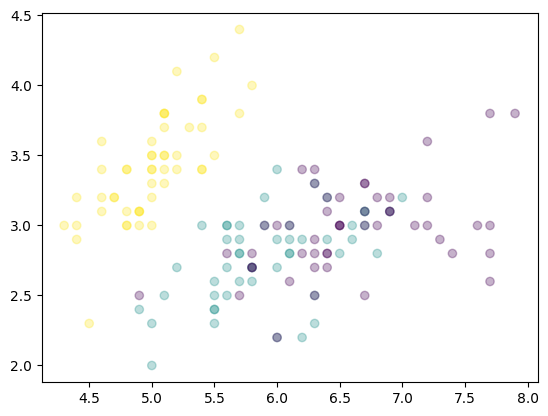

In [4]:
import matplotlib.pyplot as plt

plt.scatter(x[:,0], x[:,1], c = y, alpha = 0.3)
plt.show()

데이터 분리하기

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 41)

KNeighborsClassifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)

y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)
print("train accuracy : ", accuracy_score(y_train_pred, y_train))
print("test accuracy : ", accuracy_score(y_test_pred, y_test))

train accuracy :  0.9833333333333333
test accuracy :  0.9666666666666667


n-fold cross validation-최적의 K 찾기


In [11]:
from sklearn.model_selection import cross_val_score

scores = []
test_scores = []
k_values = range(1,31)

for k in k_values :
    knn = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn, x_train, y_train, cv = 10, scoring="accuracy")
    scores.append(score.mean())

    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    y_test_pred = knn.predict(x_test)
    test_score = accuracy_score(y_test_pred, y_test)
    test_scores.append(test_score)

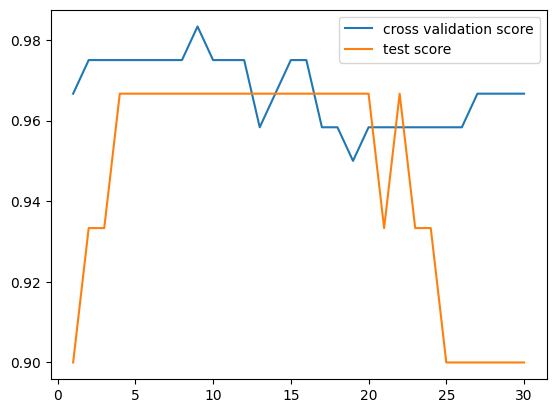

In [13]:
plt.plot(k_values, scores, label = "cross validation score")
plt.plot(k_values, test_scores, label = "test score")
plt.legend()
plt.show()